In [19]:
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
#make sure plots are embedded into the notebook
%matplotlib inline 
import statsmodels.formula.api as smf

In [14]:
# import all the similar artists expanding from the original hottest 50 artists
total_artist = pd.read_csv('similar_artists_top_50.csv', encoding="iso-8859-9")
total_artist.head()

,artist,hotttnesss
0,Justin Bieber,0.998382
1,Kygo,0.965525
2,One Direction,0.955242
3,Lost Frequencies,0.953128
4,Calvin Harris,0.952380


In [15]:
# import all the edges data
total_artist_edge = pd.read_csv('total_artist_edge.csv')
total_artist_edge.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,609,610,611,612,613,614,615,616,617,618
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# drop the first column
total_artist_edge.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
# change the row and column index of edge data by using artists' names
total_artist_edge.index=list(total_artist['artist'])
total_artist_edge.columns=list(total_artist['artist'])
total_artist_edge.head()

,Justin Bieber,Kygo,One Direction,Lost Frequencies,Calvin Harris,Taylor Swift,Ellie Goulding,Robin Schulz,Drake,Meghan Trainor,...,Broods,Gaby Moreno,Adele,Emilíana Torrini,Everything but the Girl,Little Boots,Schlachthofbronx,Charlie Puth,D-Ceptor,Blond:ish
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kygo,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
One Direction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lost Frequencies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calvin Harris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# initiate a artist network and import all the nodes
total_artist_graph = nx.DiGraph()
total_artist_list = list(total_artist['artist'])
total_artist_graph.add_nodes_from(total_artist_list)

In [18]:
# add edges 
number_of_artist = len(total_artist)
for i in range(number_of_artist):
    for j in range(number_of_artist):
        if total_artist_edge.iloc[i][j]==1:
            total_artist_graph.add_edge(total_artist_list[i],total_artist_list[j])

In [ ]:
#add length attribute to the edges
#nx.set_edge_attributes(networkA, 'dist', 0)

### Visualize the network with artist names as nodes and sizes proportional to artists' hotness

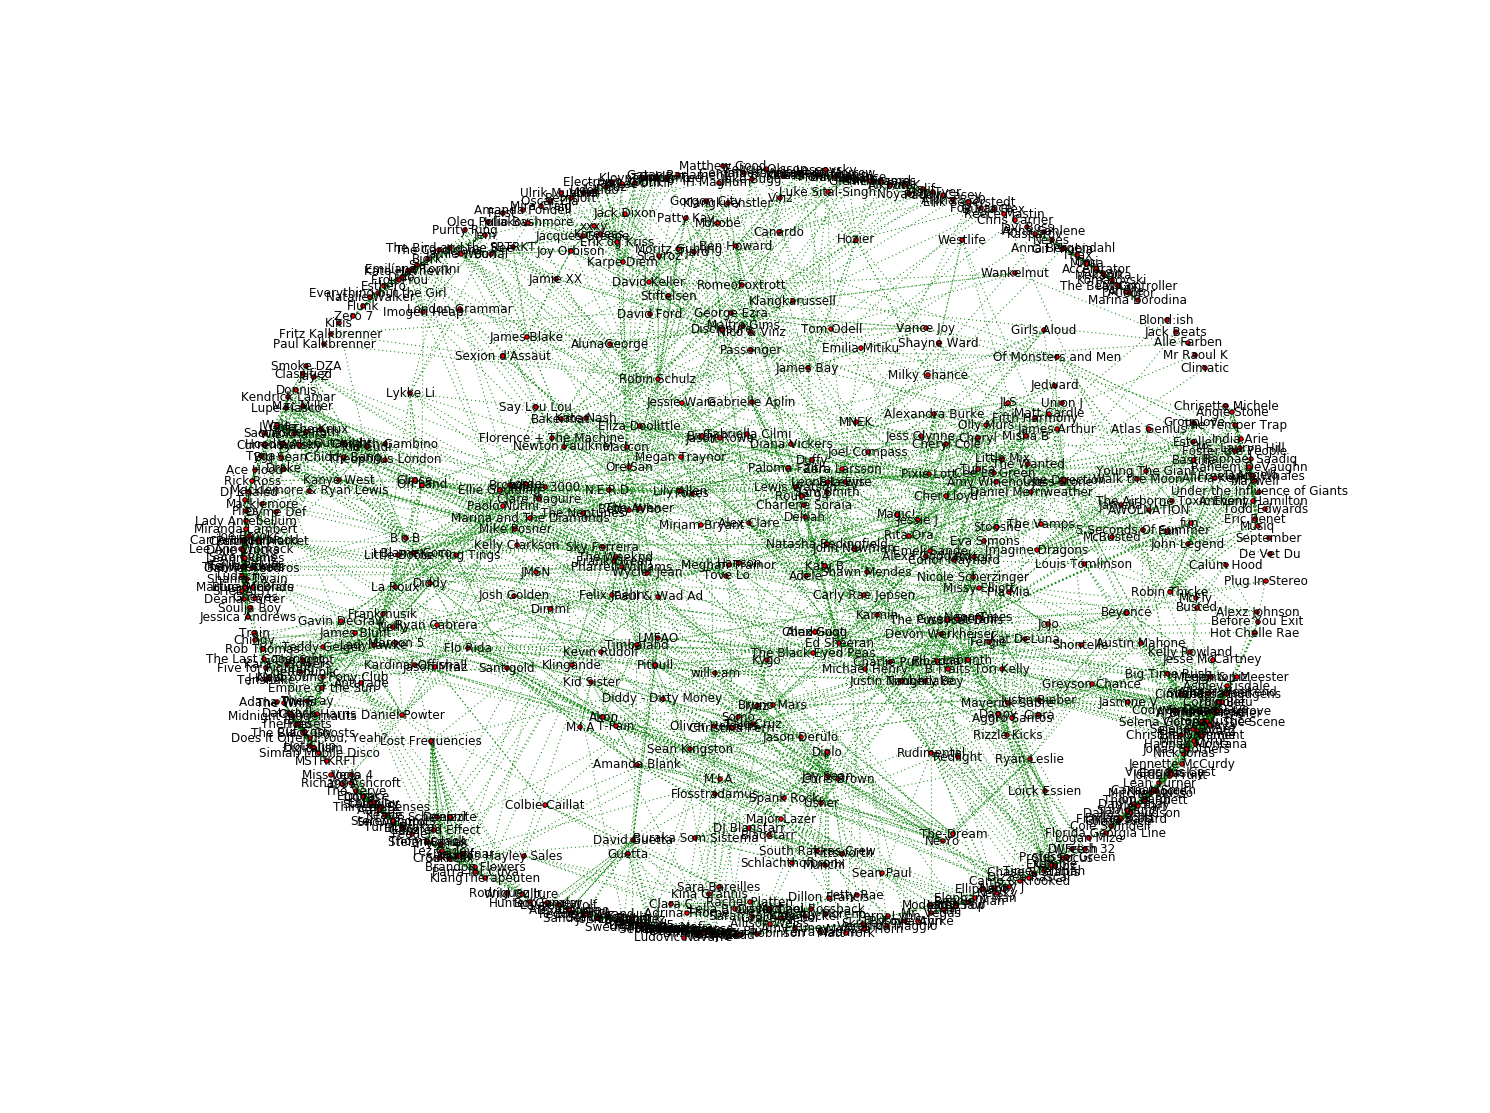

In [20]:
plt.figure(figsize = (20,15))
nx.draw(total_artist_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')

In [21]:
# compute degree Centrality
artists_degree = nx.degree(total_artist_graph)

In [ ]:
# visualize the network with the node size as a function of degree centrality
plt.figure(figsize = (12,6))
nx.draw(total_artist_graph,node_size=100*np.array(artists_degree.values()),with_labels=True,edge_color='green')

In [22]:
# output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)  # sort dictionary based on degree values
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [31]:
topdict(artists_degree,10)

1|Cher Lloyd:41
2|Rihanna:40
3|One Direction:38
4|Demi Lovato:37
5|Selena Gomez:36
6|Labrinth:36
7|Avicii:35
8|Ellie Goulding:35
9|Cheryl Cole:35
10|Jessie J:33


In [32]:
# Eigenvector Centrality
c2= nx.eigenvector_centrality(total_artist_graph)
topdict(c2,10)

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

In [33]:
# Betweeness Centrality
FCG=list(nx.connected_component_subgraphs(total_artist_graph, copy=True))[0]
c3 = nx.current_flow_betweenness_centrality(FCG)
topdict(c3,5)

NetworkXNotImplemented: not implemented for directed type

In [ ]:
# Closeness Centrality
c4 = nx.closeness_centrality(FCG)
topdict(c4,5)

In [34]:
# Pagerank Centrality
a = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for i in a:
    c5 = nx.pagerank(total_artist_graph,i)
    print ('a={0}'.format(i))
    topdict(c5,5)

a=0.95
1|Mitchel Musso:0.0164397110113
2|Jordan Pruitt:0.0161930996702
3|Jennette McCurdy:0.0157687066521
4|Victorious Cast:0.0156359984099
5|Rick Ross:0.0121600646877
a=0.9
1|Mitchel Musso:0.011959536751
2|Jordan Pruitt:0.011579342984
3|Jennette McCurdy:0.011045762156
4|Victorious Cast:0.0108850268804
5|Rick Ross:0.00932627897461
a=0.85
1|Mitchel Musso:0.00938704445657
2|Jordan Pruitt:0.00892712357296
3|Jennette McCurdy:0.00838336391691
4|Victorious Cast:0.00822681096342
5|Rick Ross:0.00773628973915
a=0.8
1|Mitchel Musso:0.00770370550087
2|Jordan Pruitt:0.00719938331944
3|Jennette McCurdy:0.00668484519245
4|Rick Ross:0.00665438544005
5|Victorious Cast:0.00654470478923
a=0.7
1|Mitchel Musso:0.00561455163077
2|Rick Ross:0.00520157463747
3|Tinie Tempah:0.00518659283704
4|Jordan Pruitt:0.00508943848656
5|Ne-Yo:0.00506977603174
a=0.6
1|Mitchel Musso:0.00436490908859
2|Tinie Tempah:0.00432740282422
3|Cheryl Cole:0.00431940829137
4|Ne-Yo:0.00424595992792
5|Rick Ross:0.00423742030921
a=0.5
1|

In [38]:
#introduce auxiliary function visualizing the degree rank plots
def rankPlot(x,params=[]):
  #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
  #params - power-law fit cut-off
  xs=sorted(x,reverse=True) # sort the sequence in decreasing order
  plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
  plt.title("Centrality rank plot") #plot title
  #axe labels  
  plt.ylabel("Centrality")
  plt.xlabel("rank")
  fp=[]                  
  #lognormal fit
  xl=log(x[x>0])
  sigma=std(xl)
  mu=mean(xl)  
  fp=sigma
  s=exp(mu)*stats.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
  plt.loglog(s,'r-',marker='.')  
  plt.show()
  return fp 

In [36]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
      xh=1-cumsum(xh[:-1])
      xb=xb[:-1]
      plt.ylabel("P(c>=x)")
    else:
      plt.ylabel("p(c=x)")
    plt.loglog(exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

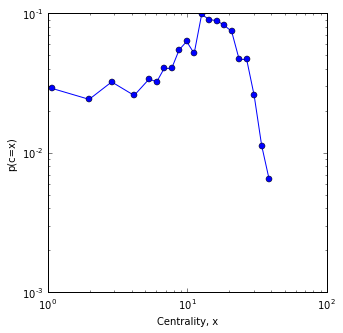

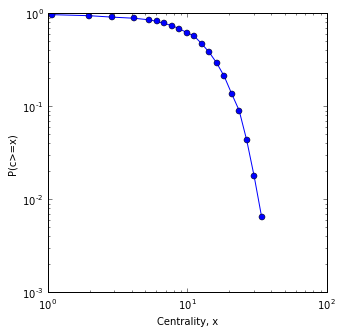

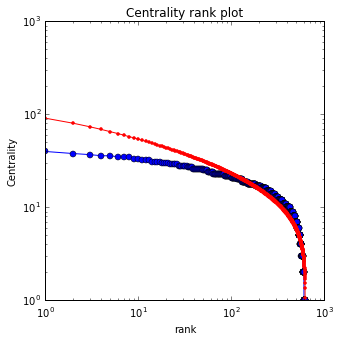

0.74609184700968001

In [40]:
#and visualize degree distributions for it
d=np.array(nx.degree(total_artist_graph).values())
plt.figure(figsize = (5,5))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (5,5))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (5,5))
rankPlot(d,[1])